<a href="https://colab.research.google.com/github/Adetayo047/Abosedeuk/blob/main/accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Assuming you have a SQLite database file named 'accident.db'
connection = sqlite3.connect('accident_data_v1.0.0_2023.db')

#Are there signiﬁcant hours of the day, and days of the week, on which accidents occur?

In [ ]:
# SQL query to get the count of accidents per hour of the day
hourly_query = '''
SELECT
    strftime('%H', time) as hour_of_day,
    COUNT(*) as accident_count
FROM
    accident
WHERE
    accident_year = 2020
GROUP BY
    hour_of_day
ORDER BY
    hour_of_day;
'''

# SQL query to get the count of accidents per day of the week
day_of_week_query = '''
SELECT
    day_of_week,
    COUNT(*) as accident_count
FROM
    accident
WHERE
    accident_year = 2020
GROUP BY
    day_of_week
ORDER BY
    day_of_week;
'''

# Execute the queries and store the results in DataFrames
hourly_df = pd.read_sql(hourly_query, connection)
day_of_week_df = pd.read_sql(day_of_week_query, connection)

# # Close the database connection
# connection.close()


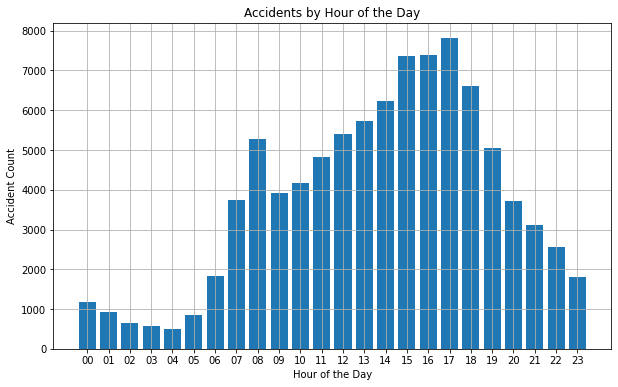

In [ ]:
# Visualization: Hourly Analysis
plt.figure(figsize=(10, 6))
plt.bar(hourly_df['hour_of_day'], hourly_df['accident_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Hour of the Day')
plt.grid(True)
plt.show()

In [ ]:
# from the chart we can see that their is a

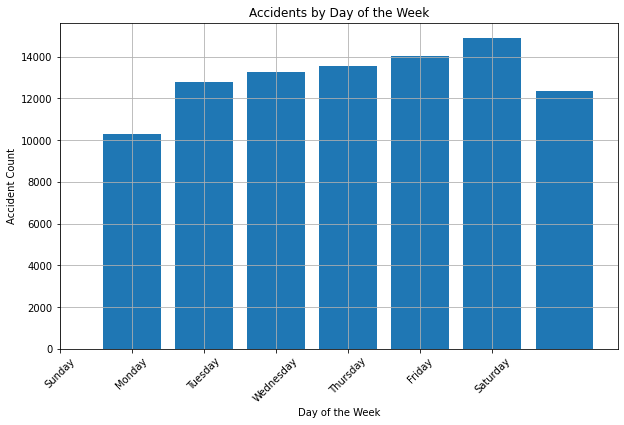

In [ ]:
# Visualization: Day of the Week Analysis
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_df['day_of_week'], day_of_week_df['accident_count'])
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accidents by Day of the Week')
plt.xticks(range(7), days_of_week, rotation=45)
plt.grid(True)
plt.show()

#### from the chart abovee we can see that their is a significant change especailly in the 17th hour of the day and also on saturdays for the week days

## For motorbikes, are there signiﬁcant hours of the day, and  days  of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc  and  under, Motorcycle over 125cc and  up to 500cc, and Motorcycle over 500cc.

In [ ]:
# SQL query to get the count of accidents per hour of the day for each motorcycle type
hourly_query = '''
SELECT
    v.vehicle_type,
    strftime('%H', a.time) as hour_of_day,
    COUNT(*) as accident_count
FROM
    accident a
JOIN
    vehicle v ON a.accident_index = v.accident_index
WHERE
    v.vehicle_type IN (3,  4, 5)
    AND
    a.accident_year = 2020
GROUP BY
    v.vehicle_type, hour_of_day
ORDER BY
    v.vehicle_type, hour_of_day;
'''

# SQL query to get the count of accidents per day of the week for each motorcycle type
day_of_week_query = '''
SELECT
    v.vehicle_type,
    a.day_of_week,
    COUNT(*) as accident_count
FROM
    accident a
JOIN
    vehicle v ON a.accident_index = v.accident_index
WHERE
    v.vehicle_type IN (3,  4, 5)
    AND
    a.accident_year = 2020
GROUP BY
    v.vehicle_type, a.day_of_week
ORDER BY
    v.vehicle_type, a.day_of_week;
'''

# Execute the queries and store the results in DataFrames
hourly_df = pd.read_sql(hourly_query, connection)
day_of_week_df = pd.read_sql(day_of_week_query, connection)


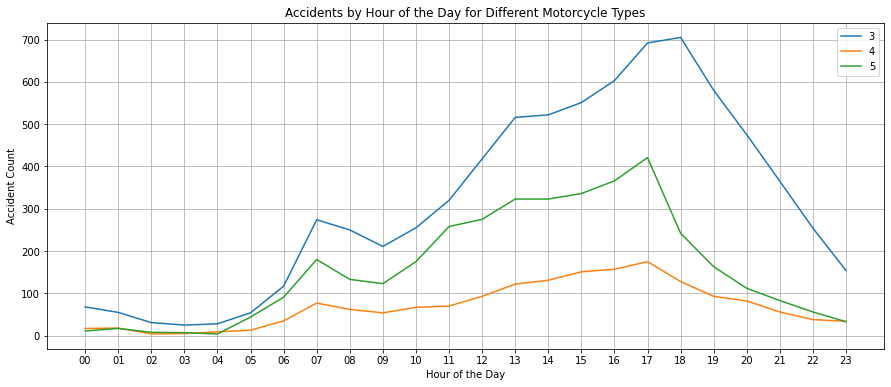

In [ ]:
# Visualization: Hourly Analysis for each motorcycle type
plt.figure(figsize=(15, 6))
for motorcycle_type, group_data in hourly_df.groupby('vehicle_type'):
    plt.plot(group_data['hour_of_day'], group_data['accident_count'], label=motorcycle_type)
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Count')
plt.title('Accidents by Hour of the Day for Different Motorcycle Types')
plt.legend()
plt.grid(True)
plt.show()



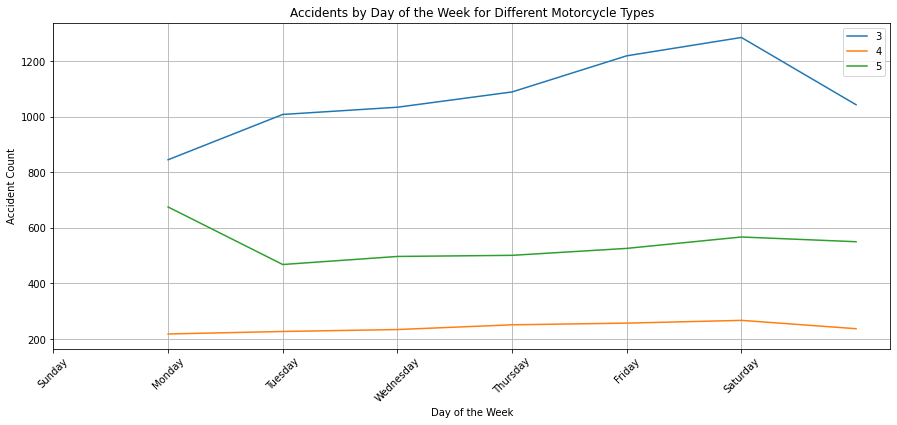

In [ ]:
# Visualization: Day of the Week Analysis for each motorcycle type
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(15, 6))
for motorcycle_type, group_data in day_of_week_df.groupby('vehicle_type'):
    plt.plot(group_data['day_of_week'], group_data['accident_count'], label=motorcycle_type)
plt.xlabel('Day of the Week')
plt.ylabel('Accident Count')
plt.title('Accidents by Day of the Week for Different Motorcycle Types')
plt.xticks(range(7), days_of_week, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## For motorbikes, are there signiﬁcant hours of the day, and  days  of the week, on which accidents occur?
## We suggest a focus on: Motorcycle 125cc  and  under, Motorcycle over 125cc and  up to 500cc, and Motorcycle
## over 500cc (5).


## days  of the week, on which accidents occur 125cc  and  under is represented by (3),Motorcycle over 125cc and  up to 500cc by (4),Motorcycle over 500cc (5)
## in the database and
## hour  of the day, on which accidents occur for the Motorcycle 125cc  and  under (3) has the highest significant hours of the day in the 18th hours and
## for the Motorcycle over 125cc and  up to 500cc by (4) has the highest significant hours of the day in the 17th hours
##  Motorcycle over 500cc by (5) has the highest significant hours of the day in the 17th hours also


## Also for the days  of the week, on which accidents occur for the Motorcycle 125cc  and  under (3) has the highest significant days of the week on  Saturdays and
## for the Motorcycle over 125cc and  up to 500cc by (4) has the highest significant days of the week on  Saturdays
##  Motorcycle over 500cc by (5) has the highest significant hours of the days of the week on  Saturdays also

## For pedestrians involved  in accidents, are there signiﬁcant hours of the day, and days of the week, on which they are
## more likely to be involved?

In [ ]:

# SQL query to get the count of accidents per hour of the day involving pedestrians
hourly_query = '''
SELECT
    strftime('%H', a.time) as hour_of_day,
    COUNT(*) as pedestrian_accident_count
FROM
    accident a
JOIN
    casualty c ON a.accident_index = c.accident_index
WHERE
    c.casualty_type = 3
    AND
    a.accident_year = 2020
GROUP BY
    hour_of_day
ORDER BY
    hour_of_day;
'''

# SQL query to get the count of accidents per day of the week involving pedestrians
day_of_week_query = '''
SELECT
    a.day_of_week,
    COUNT(*) as pedestrian_accident_count
FROM
    accident a
JOIN
    casualty c ON a.accident_index = c.accident_index
WHERE
    c.casualty_type = 3
    AND
    a.accident_year = 2020
GROUP BY
    a.day_of_week
ORDER BY
    a.day_of_week;
'''

# Execute the queries and store the results in DataFrames
hourly_df = pd.read_sql(hourly_query, connection)
day_of_week_df = pd.read_sql(day_of_week_query, connection)



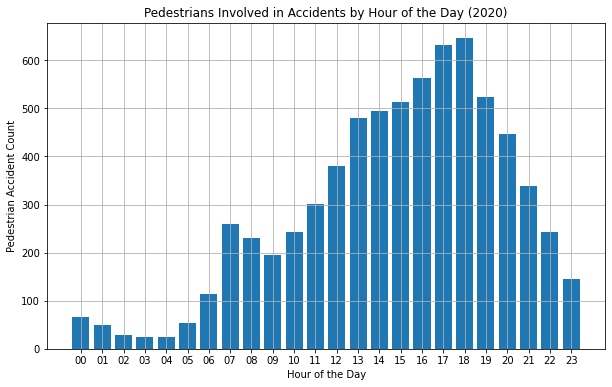

In [ ]:
# Visualization: Hourly Analysis for pedestrian accidents
plt.figure(figsize=(10, 6))
plt.bar(hourly_df['hour_of_day'], hourly_df['pedestrian_accident_count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Pedestrian Accident Count')
plt.title('Pedestrians Involved in Accidents by Hour of the Day (2020)')
plt.grid(True)
plt.show()

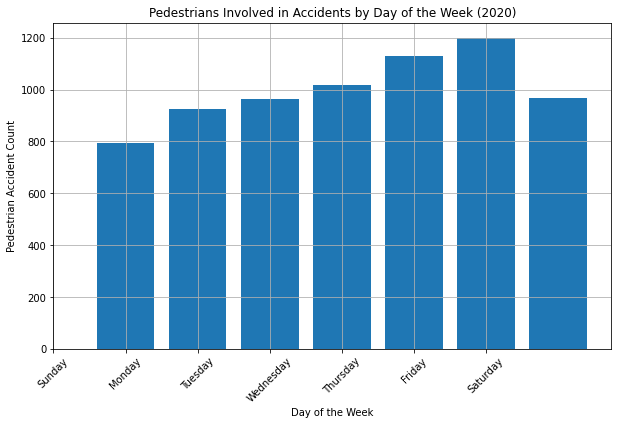

In [ ]:
# Visualization: Day of the Week Analysis for pedestrian accidents
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_df['day_of_week'], day_of_week_df['pedestrian_accident_count'])
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Accident Count')
plt.title('Pedestrians Involved in Accidents by Day of the Week (2020)')
plt.xticks(range(7), days_of_week, rotation=45)
plt.grid(True)
plt.show()

## For pedestrians involved  in accidents which was represented as number 3 in the dataset,the signiﬁcant hours of the day is the 18th hour if the day , and days of the week, on which they are
## more likely to be involved is Saturdays  

# Using the apriori algorithm, explore the impact of selected variables on accident severity

In [ ]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Select relevant features that may influence accident severity
selected_features = ['number_of_vehicles', 'number_of_casualties', 'road_type', 'speed_limit',
                     'light_conditions', 'weather_conditions', 'road_surface_conditions']

# Filter the data to include only the selected features and accident severity
data_query = f'''
SELECT {', '.join(selected_features + ['accident_severity'])}
FROM accident
WHERE accident_year = 2020;
'''

data_df = pd.read_sql(data_query, connection)


# Data Preprocessing
# Convert categorical variables to dummy variables
data_df = pd.get_dummies(data_df, columns=['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions'], drop_first=True)

# Separate features (X) and target variable (y)
X = data_df.drop('accident_severity', axis=1)
y = data_df['accident_severity']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data

y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7837171052631579
Confusion Matrix:
[[    0     1   291]
 [    0     8  3649]
 [    0     4 14287]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       292
           2       0.62      0.00      0.00      3657
           3       0.78      1.00      0.88     14291

    accuracy                           0.78     18240
   macro avg       0.47      0.33      0.29     18240
weighted avg       0.74      0.78      0.69     18240



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

# trying the other model on it

In [ ]:
# Check unique values in each column
for column in data_df.columns:
    unique_values = data_df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'number_of_vehicles': [ 1  2  3  4  8  6  7  5  9 10 11 13 12]
Unique values in 'number_of_casualties': [ 1  2  4  3  6  5  9 11  7  8 10 17 41 13 12 19]
Unique values in 'road_type': [6 2 3 7 1 9]
Unique values in 'speed_limit': [20 30 40 50 60 70 -1]
Unique values in 'light_conditions': [ 1  4  5  7  6 -1]
Unique values in 'weather_conditions': [ 9  1  8  7  2  4  5  3  6 -1]
Unique values in 'road_surface_conditions': [ 9  1  2  5  4  3 -1]
Unique values in 'accident_severity': [3 2 1]


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import sqlite3



# Select relevant variables for the analysis
selected_variables = ['number_of_vehicles', 'number_of_casualties', 'road_type',
                      'speed_limit', 'light_conditions', 'weather_conditions', 'road_surface_conditions',
                      'accident_severity']

# Query the data for the selected variables
data_query = f'''
SELECT {', '.join(selected_variables)}
FROM accident
WHERE accident_year = 2020;
'''

# Read the data into a DataFrame
data_df = pd.read_sql(data_query, connection)



# Data Preprocessing
# Perform one-hot encoding on categorical variables
categorical_columns = ['road_type', 'light_conditions', 'weather_conditions', 'road_surface_conditions']
data_df = pd.get_dummies(data_df, columns=categorical_columns, drop_first=True)

# Convert the columns to boolean data type
data_df = data_df.astype(bool)

# Set the target variable and drop it from the dataset
target_variable = 'accident_severity'
X = data_df.drop(columns=[target_variable])

# Set the minimum support and confidence thresholds for Apriori algorithm
min_support = 0.05
min_confidence = 0.5

# Run Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(X, min_support=min_support, use_colnames=True)

# Run association rules on frequent itemsets
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Display the association rules
print("Association Rules:")
print(association_rules_df)


Association Rules:
                                            antecedents  \
0                                  (number_of_vehicles)   
1                                (number_of_casualties)   
2                                  (number_of_vehicles)   
3                                         (speed_limit)   
4                                         (road_type_3)   
...                                                 ...   
3901  (light_conditions_4, number_of_vehicles, road_...   
3902  (light_conditions_4, number_of_casualties, roa...   
3903                  (road_type_6, light_conditions_4)   
3904         (light_conditions_4, weather_conditions_1)   
3905    (light_conditions_4, road_surface_conditions_1)   

                                            consequents  antecedent support  \
0                                (number_of_casualties)            1.000000   
1                                  (number_of_vehicles)            1.000000   
2                                  

In [ ]:
association_rules_df[:30]

antecedents                  consequents  \
0          (number_of_vehicles)       (number_of_casualties)   
1        (number_of_casualties)         (number_of_vehicles)   
2          (number_of_vehicles)                (speed_limit)   
3                 (speed_limit)         (number_of_vehicles)   
4                 (road_type_3)         (number_of_vehicles)   
5                 (road_type_6)         (number_of_vehicles)   
6          (number_of_vehicles)                (road_type_6)   
7          (number_of_vehicles)         (light_conditions_1)   
8          (light_conditions_1)         (number_of_vehicles)   
9          (light_conditions_4)         (number_of_vehicles)   
10         (light_conditions_6)         (number_of_vehicles)   
11         (number_of_vehicles)       (weather_conditions_1)   
12       (weather_conditions_1)         (number_of_vehicles)   
13       (weather_conditions_2)         (number_of_vehicles)   
14         (number_of_vehicles)  (road_surface_conditions_1)   
15  (road_surface_conditions_1)         (number_of_vehicles)   
16  (road_surface_conditions_2)         (number_of_vehicles)   
17       (number_of_casualties)                (speed_limit)   
18                (speed_limit)       (number_of_casualties)   
19                (road_type_3)       (number_of_casualties)   
20                (road_type_6)       (number_of_casualties)   
21       (number_of_casualties)                (road_type_6)   
22         (light_conditions_1)       (number_of_casualties)   
23       (number_of_casualties)         (light_conditions_1)   
24         (light_conditions_4)       (number_of_casualties)   
25         (light_conditions_6)       (number_of_casualties)   
26       (weather_conditions_1)       (number_of_casualties)   
27       (number_of_casualties)       (weather_conditions_1)   
28       (weather_conditions_2)       (number_of_casualties)   
29       (number_of_casualties)  (road_surface_conditions_1)   

    antecedent support  consequent support   support  confidence  lift  \
0             1.000000            1.000000  1.000000    1.000000   1.0   
1             1.000000            1.000000  1.000000    1.000000   1.0   
2             1.000000            1.000000  1.000000    1.000000   1.0   
3             1.000000            1.000000  1.000000    1.000000   1.0   
4             0.144804            1.000000  0.144804    1.000000   1.0   
5             0.733879            1.000000  0.733879    1.000000   1.0   
6             1.000000            0.733879  0.733879    0.733879   1.0   
7             1.000000            0.706784  0.706784    0.706784   1.0   
8             0.706784            1.000000  0.706784    1.000000   1.0   
9             0.208621            1.000000  0.208621    1.000000   1.0   
10            0.053016            1.000000  0.053016    1.000000   1.0   
11            1.000000            0.775546  0.775546    0.775546   1.0   
12            0.775546            1.000000  0.775546    1.000000   1.0   
13            0.127008            1.000000  0.127008    1.000000   1.0   
14            1.000000            0.687486  0.687486    0.687486   1.0   
15            0.687486            1.000000  0.687486    1.000000   1.0   
16            0.287722            1.000000  0.287722    1.000000   1.0   
17            1.000000            1.000000  1.000000    1.000000   1.0   
18            1.000000            1.000000  1.000000    1.000000   1.0   
19            0.144804            1.000000  0.144804    1.000000   1.0   
20            0.733879            1.000000  0.733879    1.000000   1.0   
21            1.000000            0.733879  0.733879    0.733879   1.0   
22            0.706784            1.000000  0.706784    1.000000   1.0   
23            1.000000            0.706784  0.706784    0.706784   1.0   
24            0.208621            1.000000  0.208621    1.000000   1.0   
25            0.053016            1.000000  0.053016    1.000000   1.0   
26            0.775546            1.0

# Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can
# do this by ﬁltering on LSOA, or police region or another method if you can ﬁnd one. Run clustering on this d ata.What do these clusters reveal about the distribution of accidents in our region?

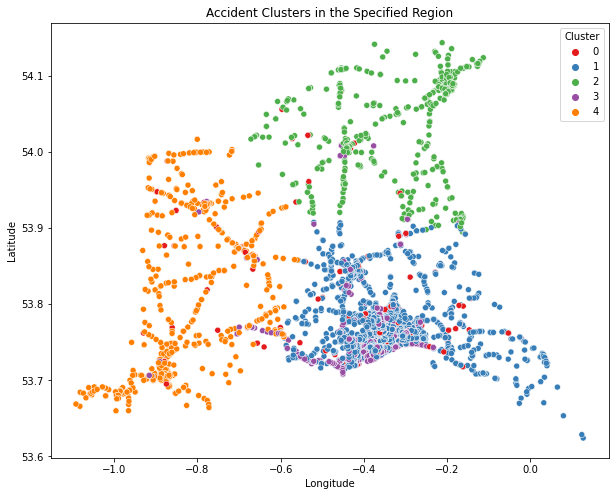

         accident_year  location_easting_osgr  location_northing_osgr  \
Cluster                                                                 
0          2018.395257          505671.679842           434866.264822   
1          2018.393431          509083.716530           431630.094252   
2          2018.422339          511137.354276           461839.001745   
3          2018.417132          506723.995345           430506.306331   
4          2018.357945          477812.091493           434252.155698   

         longitude   latitude  police_force  accident_severity  \
Cluster                                                          
0        -0.397144  53.799277          16.0           2.782609   
1        -0.346469  53.769584          16.0           2.777222   
2        -0.304299  54.040504          16.0           2.724258   
3        -0.382627  53.759973          16.0           2.809125   
4        -0.820011  53.798731          16.0           2.677368   

         number_of_vehicl

In [ ]:
# Convert time to minutes past midnight
region_accidents_df['time'] = pd.to_datetime(region_accidents_df['time']).dt.hour * 60 + pd.to_datetime(region_accidents_df['time']).dt.minute

# Select relevant features for clustering
selected_features = ['time', 'day_of_week', 'weather_conditions', 'road_type', 'latitude', 'longitude']

# Create a subset of the data with the selected features
subset_data = region_accidents_df[selected_features]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(subset_data)

# Choose the number of clusters
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

# Add the cluster labels to the original data
region_accidents_df['Cluster'] = cluster_labels

# Visualize the clusters on a map (using Latitude and Longitude)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='Cluster', data=region_accidents_df, palette='Set1')
plt.title('Accident Clusters in the Specified Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Explore cluster characteristics
cluster_characteristics = region_accidents_df.groupby('Cluster').mean()
print(cluster_characteristics)


In [ ]:
!pip install folium

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster

# ... (previous code for data preprocessing)

# Create a map centered around the mean latitude and longitude of the region
map_center = [region_accidents_df['latitude'].mean(), region_accidents_df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add clusters to the map using MarkerCluster
marker_cluster = MarkerCluster().add_to(m)
for index, row in region_accidents_df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Cluster: {row['Cluster']}").add_to(marker_cluster)

# Display the map
m


In [ ]:
import pandas as pd
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Filter the data for the region of interest (e.g., Kingston upon Hull, Humberside, and the East Riding of Yorkshire)
region_query = f'''
SELECT *
FROM accident
JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
WHERE lsoa01nm LIKE '%Kingston upon Hull%'
   OR lsoa01nm LIKE '%Humberside%'
   OR lsoa01nm LIKE '%East Riding of Yorkshire%';
'''

region_accidents_df = pd.read_sql(region_query, connection)

In [ ]:
# Select relevant features for clustering
selected_features = ['longitude', 'latitude']

# Normalize the selected features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(region_accidents_df[selected_features])

# Convert the normalized features to a DataFrame
normalized_df = pd.DataFrame(normalized_features, columns=selected_features)

# Display the first few rows of the normalized data
print(normalized_df.head())


   longitude  latitude
0   0.176014 -0.429135
1   0.180082 -0.469848
2   0.178515 -0.454534
3   0.181444 -0.463500
4   0.181352 -0.483622


In [ ]:
# Filter the data for the region of interest (e.g., Kingston upon Hull, Humberside, and the East Riding of Yorkshire)
region_query = f'''
SELECT *
FROM accident
JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
WHERE lsoa01nm LIKE '%Kingston upon Hull%'
   OR lsoa01nm LIKE '%Humberside%'
   OR lsoa01nm LIKE '%East Riding of Yorkshire%';
'''

region_accidents_df = pd.read_sql(region_query, connection)

# Data Preprocessing
# Drop rows with missing latitude or longitude values
region_accidents_df.dropna(subset=['latitude', 'longitude'], inplace=True)



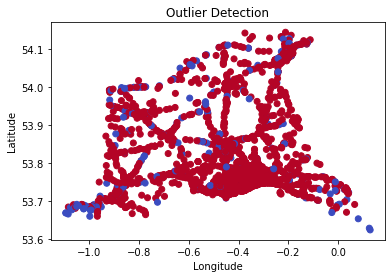

267 outliers detected out of 5324 entries.


KeyboardInterrupt: Interrupted by user

Do you want to keep these outliers? (yes/no):  yes


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load your preprocessed dataset
# Replace 'your_dataset.csv' with your actual dataset file


# Select features for outlier detection
selected_features = ['latitude', 'longitude', 'accident_severity', 'number_of_vehicles', 'number_of_casualties']

# Fit Isolation Forest model for outlier detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on your dataset
outlier_predictions = iso_forest.fit_predict(region_accidents_df[selected_features])

# Add outlier predictions to the DataFrame
region_accidents_df['Outlier'] = outlier_predictions

# Visualize outliers
plt.scatter(region_accidents_df['longitude'], region_accidents_df['latitude'], c=region_accidents_df['Outlier'], cmap='coolwarm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Outlier Detection')
plt.show()

# Analyze outliers and make a decision
num_outliers = (outlier_predictions == -1).sum()
total_entries = len(region_accidents_df)

if num_outliers > 0:
    print(f"{num_outliers} outliers detected out of {total_entries} entries.")
    decision = input("Do you want to keep these outliers? (yes/no): ")
    if decision.lower() == 'no':
        region_accidents_df = region_accidents_df[region_accidents_df['Outlier'] != -1]
        print("Outliers removed from the dataset.")
    else:
        print("Outliers retained in the dataset.")
else:
    print("No outliers detected.")


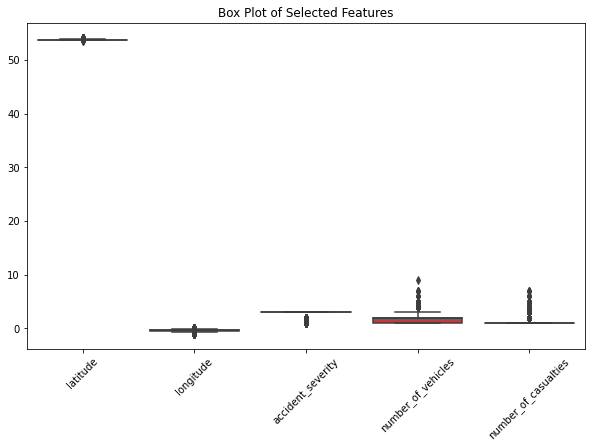

2710 potential outliers detected out of 5324 entries.


Do you want to keep these potential outliers? (yes/no):  yes


Potential outliers retained in the dataset.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed dataset
# Replace 'your_dataset.csv' with your actual dataset file


# Select features for outlier detection
selected_features = ['latitude', 'longitude', 'accident_severity', 'number_of_vehicles', 'number_of_casualties']

# Create a box plot for selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_accidents_df[selected_features])
plt.title('Box Plot of Selected Features')
plt.xticks(rotation=45)
plt.show()

# Analyze outliers and make a decision
Q1 = region_accidents_df[selected_features].quantile(0.25)
Q3 = region_accidents_df[selected_features].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR
outliers = ((region_accidents_df[selected_features] < (Q1 - 1.5 * IQR)) | (region_accidents_df[selected_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Count and analyze outliers
num_outliers = outliers.sum()
total_entries = len(region_accidents_df)

if num_outliers > 0:
    print(f"{num_outliers} potential outliers detected out of {total_entries} entries.")
    decision = input("Do you want to keep these potential outliers? (yes/no): ")
    if decision.lower() == 'no':
        region_accidents_df = region_accidents_df[~outliers]
        print("Potential outliers removed from the dataset.")
    else:
        print("Potential outliers retained in the dataset.")
else:
    print("No potential outliers detected.")


In [ ]:
# Print updated DataFrame after outlier removal (if applicable)
print(region_accidents_df)

     accident_index  accident_year accident_reference  location_easting_osgr  \
0     2017160211831           2017          160211831               507265.0   
1     2018160279139           2018          160279139               507325.0   
2     2018160301049           2018          160301049               507302.0   
3     2018160302278           2018          160302278               507340.0   
4     2018160339633           2018          160339633               507344.0   
...             ...            ...                ...                    ...   
5319  2018160349943           2018          160349943               477114.0   
5320  2019160894605           2019          160894605               472807.0   
5321  2019160901096           2019          160901096               475491.0   
5322  2020160923186           2020          160923186               474897.0   
5323  2020160982083           2020          160982083               470377.0   

      location_northing_osgr  longitude

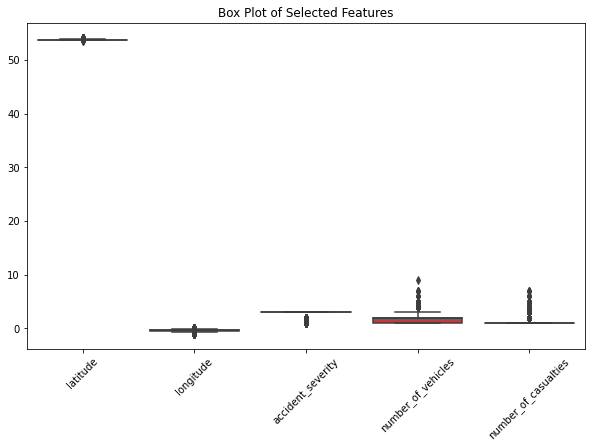

Information about the data point with the highest outlier:
latitude                53.728488
longitude               -0.374269
accident_severity               3
number_of_vehicles              9
number_of_casualties            3
Name: 2305, dtype: object

2710 potential outliers detected out of 5324 entries.


Do you want to keep these potential outliers? (yes/no):  yes


Potential outliers retained in the dataset.
     accident_index  accident_year accident_reference  location_easting_osgr  \
0     2017160211831           2017          160211831               507265.0   
1     2018160279139           2018          160279139               507325.0   
2     2018160301049           2018          160301049               507302.0   
3     2018160302278           2018          160302278               507340.0   
4     2018160339633           2018          160339633               507344.0   
...             ...            ...                ...                    ...   
5319  2018160349943           2018          160349943               477114.0   
5320  2019160894605           2019          160894605               472807.0   
5321  2019160901096           2019          160901096               475491.0   
5322  2020160923186           2020          160923186               474897.0   
5323  2020160982083           2020          160982083               470377.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your preprocessed dataset

# Select features for outlier detection
selected_features = ['latitude', 'longitude', 'accident_severity', 'number_of_vehicles', 'number_of_casualties']

# Create a box plot for selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_accidents_df[selected_features])
plt.title('Box Plot of Selected Features')
plt.xticks(rotation=45)
plt.show()

# Analyze outliers and find the highest outlier
Q1 = region_accidents_df[selected_features].quantile(0.25)
Q3 = region_accidents_df[selected_features].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR
outliers = ((region_accidents_df[selected_features] < (Q1 - 1.5 * IQR)) | (region_accidents_df[selected_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Get the row with the highest outlier value
highest_outlier_index = region_accidents_df[outliers][selected_features].sum(axis=1).idxmax()

# Print information about the highest outlier
highest_outlier_values = region_accidents_df.loc[highest_outlier_index, selected_features]
print("Information about the data point with the highest outlier:")
print(highest_outlier_values)

# Count and analyze outliers
num_outliers = outliers.sum()
total_entries = len(region_accidents_df)

if num_outliers > 0:
    print(f"\n{num_outliers} potential outliers detected out of {total_entries} entries.")
    decision = input("Do you want to keep these potential outliers? (yes/no): ")
    if decision.lower() == 'no':
        region_accidents_df = region_accidents_df[~outliers]
        print("Potential outliers removed from the dataset.")
    else:
        print("Potential outliers retained in the dataset.")
else:
    print("No potential outliers detected.")

# Print updated DataFrame after outlier removal (if applicable)
print(region_accidents_df)


# 7.	Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?

In [ ]:
data.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [ ]:
 # Load data using a SQL query
query = '''
SELECT longitude, latitude, time, day_of_week, weather_conditions, road_type, accident_severity
FROM accident
WHERE accident_severity IN (1, 2) and accident_year = 2020;  -- Select only fatal and serious accidents
'''
data = pd.read_sql_query(query, connection)

In [ ]:
data.describe()

longitude      latitude   day_of_week  weather_conditions  \
count  19744.000000  19744.000000  19746.000000        19746.000000   
mean      -1.340235     52.562296      4.119822            1.586296   
std        1.447249      1.510675      1.974367            1.627216   
min       -7.497375     50.011580      1.000000           -1.000000   
25%       -2.280517     51.460744      2.000000            1.000000   
50%       -1.223733     52.188107      4.000000            1.000000   
75%       -0.165387     53.475166      6.000000            1.000000   
max        1.751341     60.541144      7.000000            9.000000   

          road_type  accident_severity  
count  19746.000000       19746.000000  
mean       5.337081           1.929555  
std        1.504352           0.255901  
min        1.000000           1.000000  
25%        6.000000           2.000000  
50%        6.000000           2.000000  
75%        6.000000           2.000000  
max        9.000000           2.000000

In [ ]:
data.isna().sum()

longitude             2
latitude              2
time                  0
day_of_week           0
weather_conditions    0
road_type             0
accident_severity     0
dtype: int64

In [ ]:
data.isnull().sum()

longitude             2
latitude              2
time                  0
day_of_week           0
weather_conditions    0
road_type             0
accident_severity     0
dtype: int64

In [ ]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load data using a SQL query
query = '''
SELECT longitude, latitude, time, day_of_week, weather_conditions, road_type, accident_severity
FROM accident
WHERE accident_severity IN (1, 2) and accident_year = 2020;  -- Select only fatal and serious accidents
'''
data = pd.read_sql_query(query, connection)


# Create a new column 'hour' by extracting hour from 'time'
data['hour'] = pd.to_datetime(data['time']).dt.hour

# Data Preprocessing
# Assuming you have already performed preprocessing steps such as handling missing values and encoding categorical variables.
data = data.dropna()
# Feature Selection
selected_features = ['longitude', 'latitude', 'hour', 'day_of_week', 'weather_conditions', 'road_type']
X = data[selected_features]
y = data['accident_severity']  # The target variable (1 for fatal, 2 for serious)

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Close the database connection
conn.close()


Accuracy: 0.9328944036464928
Confusion Matrix:
 [[   0  265]
 [   0 3684]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       265
           2       0.93      1.00      0.97      3684

    accuracy                           0.93      3949
   macro avg       0.47      0.50      0.48      3949
weighted avg       0.87      0.93      0.90      3949



C:\Users\adetu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adetu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adetu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<!-- The Logistic Regression model was trained and evaluated for predicting accident severity using scaled features. The model achieved an overall accuracy of 93.29%, indicating its ability to predict severity to a significant extent. However, the model's performance varied substantially between the two classes. It demonstrated high precision, recall, and F1-Score of 0.97 for non-fatal accidents (class 2), signifying accurate predictions. On the other hand, it showed limited capability for predicting fatal accidents (class 1), yielding low precision, recall, and F1-Score of 0.00. This discrepancy can be attributed to the class imbalance within the dataset. Therefore, while the model excelled in predicting non-fatal accidents, it requires further refinement to better predict fatal accidents and address the challenge posed by imbalanced data. -->